In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv(r"C:\Users\suhye\Desktop\ADP\titanic_train.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(titanic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace = True)
titanic_df['Embarked'].fillna('N',inplace=True)
print("Null 개수 : ",titanic_df.isnull().sum().sum())

Null 개수 :  0


In [5]:
print("sex : \n",titanic_df['Sex'].value_counts())
print("\n Cabin : \n",titanic_df['Cabin'].value_counts())
print("\n Embarked : \n",titanic_df['Embarked'].value_counts())

sex : 
 male      577
female    314
Name: Sex, dtype: int64

 Cabin : 
 N              687
G6               4
B96 B98          4
C23 C25 C27      4
F2               3
              ... 
B101             1
E17              1
A6               1
E49              1
T                1
Name: Cabin, Length: 148, dtype: int64

 Embarked : 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [6]:
#Cabin 컬럼의 앞 문자만 추출
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head())

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object


In [7]:
#성별에 따른 생존자 수
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

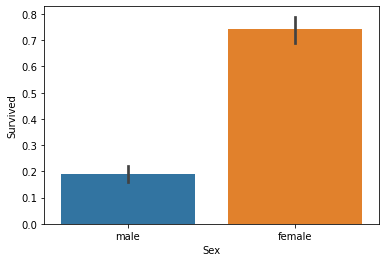

In [8]:
sns.barplot(x='Sex',y = 'Survived',data = titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

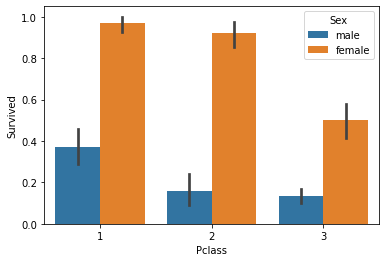

In [9]:
#부자,가난한 사람의 생존
sns.barplot(x='Pclass',y='Survived',hue='Sex',data = titanic_df)

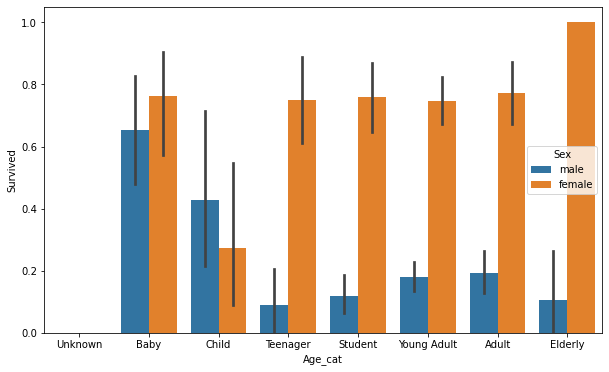

In [11]:
#age에 따라 구분 값 반환 함수 설정
def get_category(age):
    cat = ''
    if age <= -1: cat='Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
        
    return cat

plt.figure(figsize=(10,6))

#X축 값을 순차적으로 표시
group_names = ['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat',y='Survived',hue='Sex',data = titanic_df,order = group_names)
titanic_df.drop('Age_cat',axis=1,inplace=True)

In [17]:
#문자열 -> 숫자
from sklearn.preprocessing import LabelEncoder

def encode(dataDF):
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF


titanic_df = encode(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,147,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,147,2


In [18]:
#결측 처리
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    return df


#불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df


#레이블 인코딩
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df


#데이터 전처리 함수
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [19]:
#원본데이터 재로딩
titanic_df = pd.read_csv(r"C:\Users\suhye\Desktop\ADP\titanic_train.csv")

#피처데이터셋과 레이블 데이터셋 추출
y = titanic_df['Survived']
X = titanic_df.drop('Survived',axis=1)

#힘수 적용
X = transform_features(X)

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=11)

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(random_state=156)
rf = RandomForestClassifier(random_state=156)
lr = LogisticRegression()

#DecisionTree
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)
print("DecisionTree accuracy score : {0:.4f}".format(accuracy_score(y_test,dt_pred)))


#RandomForest
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
print("RandomForest accuracy score : {0:.4f}".format(accuracy_score(y_test,rf_pred)))


#LogisticRegression 
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
print("LogisticRegression accuracy score : {0:.4f}".format(accuracy_score(y_test,lr_pred)))

DecisionTree accuracy score : 0.8045
RandomForest accuracy score : 0.8436
LogisticRegression accuracy score : 0.8492


C:\Users\suhye\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
from sklearn.model_selection import KFold

def exec_kfold(clf,folds=5):
    kfold = KFold(n_splits=folds)
    scores = []
    
    #KFold
    for iter_count,(train_index,test_index) in enumerate(kfold.split(X)):
        X_train,X_test = X.values[train_index], X.values[test_index]
        y_train,y_test = y.values[train_index],y.values[test_index]
        
        clf.fit(X_train,y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test,predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도 : {1:.4f}".format(iter_count,accuracy))
        
    
    
    #5 fold 평균 정확도 
    mean_score = np.mean(scores)
    print("평균 정확도 : {0:.4f}".format(mean_score))
    
    
exec_kfold(dt,folds=5)

교차 검증 0 정확도 : 0.7542
교차 검증 1 정확도 : 0.7640
교차 검증 2 정확도 : 0.7865
교차 검증 3 정확도 : 0.7584
교차 검증 4 정확도 : 0.8371
평균 정확도 : 0.7801


In [23]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt,X,y,cv=5)
for iter_count,accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도 : {1:.4f}".format(iter_count,accuracy))
    
print("평균 정확도 : {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도 : 0.7486
교차 검증 1 정확도 : 0.7697
교차 검증 2 정확도 : 0.7978
교차 검증 3 정확도 : 0.7809
교차 검증 4 정확도 : 0.8202
평균 정확도 : 0.7834


In [25]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth':[2,3,5,10],
         'min_samples_split':[2,3,5],
         'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt,param_grid = params,scoring='accuracy',cv=5)
grid_dclf.fit(X_train,y_train)

print("best parameter : ",grid_dclf.best_params_)
print("best score : {0:.4f}".format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

#GridSearchCV의 최적 파라미터로 예측 및 평가
best = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test,best)
print("테스트 데이터 정확도 : {0:.4f}".format(accuracy))

best parameter :  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
best score : 0.7992
테스트 데이터 정확도 : 0.8715
